In [2]:
''' 

    Lesson Two
    Automating GIS Processing in Python
    https://automating-gis-processes.github.io/2016/Lesson1-Geometric-Objects.html
    
    Focus: Learning how to read and write spatial data in Python using Geopandas
'''

%matplotlib inline 
# import necessary modules
import geopandas as gpd

# set file path
fp = '/home/mapper/Documents/Python/GeoPythonExamples/Data/DAMSELFISH_distributions.shp'

# Read the file using gpd.read_file()
data = gpd.read_file(fp)
type(data)


geopandas.geodataframe.GeoDataFrame

In [3]:
print(data.head())

      id_no             binomial  origin compiler  year  \
0  183963.0   Stegastes leucorus       1     IUCN  2010   
1  183963.0   Stegastes leucorus       1     IUCN  2010   
2  183963.0   Stegastes leucorus       1     IUCN  2010   
3  183793.0  Chromis intercrusma       1     IUCN  2010   
4  183793.0  Chromis intercrusma       1     IUCN  2010   

                                            citation source dist_comm island  \
0  International Union for Conservation of Nature...                           
1  International Union for Conservation of Nature...                           
2  International Union for Conservation of Nature...                           
3  International Union for Conservation of Nature...                           
4  International Union for Conservation of Nature...                           

  subspecies                        ...                         rl_update  \
0                                   ...                            2012.1   
1         

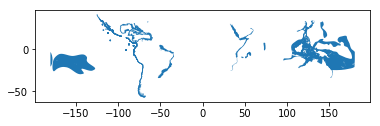

In [4]:
data.plot();

In [5]:
# read the coordinate system
data.crs

{'init': 'epsg:4326'}

In [6]:
# write a shapefile

# create an output path for the data
out = r"/home/mapper/Documents/Python/GeoPythonExamples/Data/DAMSELFISH_distributions_SELECTION.shp"

# select the first 50 rows
selection = data[:50]

# Write the selected rows into a new shapefile (default format = shapefile)
selection.to_file(out)


50

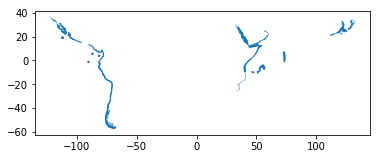

In [49]:
fp2 = "/home/mapper/Documents/Python/GeoPythonExamples/Data/DAMSELFISH_distributions_SELECTION.shp"
data2 = gpd.read_file(fp2)
data2.plot();
len(data2.index)

In [7]:
# Geometries in Geopandas
data['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

In [8]:
# select the first 5 rows
selectFive = data[:5]

# iterate over the selected rows using a specific .iterrows() function in geopandas 

for index, row in selectFive.iterrows():
    poly_area = row['geometry'].area
    print('Polygon area at index {0} is: {1:.3f}'.format(index, poly_area))


Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


In [9]:
# empty column for area
data['area'] = None

In [10]:
for index, row in data.iterrows():
    data.loc[index, 'area'] = row['geometry'].area    

In [11]:
data.loc[:1, 'area']
data['area'].head(2)

0    19.3963
1     6.1459
Name: area, dtype: object

In [12]:
# find the maximum area

max_area = data['area'].max()
min_area = data['area'].min()

print('Max area: %s\nMin area: %s' % (round(max_area, 2), round(min_area, 2)))

Max area: 1493.2
Min area: 0.0


In [13]:
# Creating Geometries into a GeoDataFrame - easy to convert a text file that contains coordinates into a shapefile

# import necessary modules

import pandas as pd
from shapely.geometry import Point, Polygon
import fiona



In [14]:
# Create and empty geopandas GeoDataFrame

newdata = gpd.GeoDataFrame()


In [15]:
newdata['geometry'] = None

newdata

,geometry


In [16]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

poly


In [17]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

print(newdata)


                                            geometry
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...


In [18]:
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'Senaatintori'

print(newdata)

                                            geometry      Location
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...  Senaatintori


In [19]:
print(newdata.crs)

In [20]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

newdata.crs

In [21]:
# Determine the output path for the Shapefile
outfp = r"/home/mapper/Documents/Python/GeoPythonExamples/Data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)